In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
iris=pd.DataFrame(pd.read_csv("iris.csv"))
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop("species",axis=1),iris["species"],test_size=0.2,random_state=42)
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("accuracy_score:",acc)

accuracy_score: 1.0


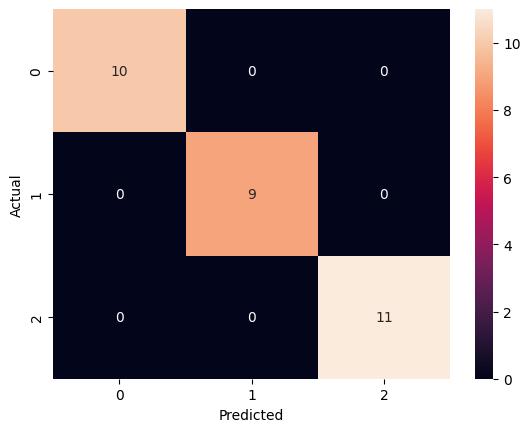

In [10]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
diabetes=pd.DataFrame(pd.read_csv("diabetes.csv"))
diabetes
Scaler=StandardScaler()
for i in diabetes.columns[:-1]:
  diabetes[i]=Scaler.fit_transform(diabetes[[i]])
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


[0.6168831168831169, 0.6558441558441559, 0.7012987012987013, 0.6948051948051948, 0.6883116883116883, 0.7012987012987013, 0.6818181818181818, 0.6883116883116883, 0.6818181818181818, 0.6818181818181818, 0.7142857142857143, 0.7207792207792207, 0.7142857142857143, 0.7207792207792207, 0.7207792207792207, 0.7467532467532467, 0.7532467532467533, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597]


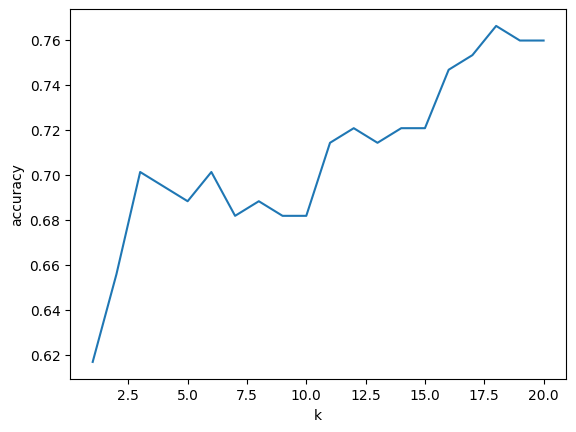

max_acc: 0.7662337662337663
max_k: 18


In [27]:
X_train,X_test,y_train,y_test=train_test_split(diabetes.drop("Outcome",axis=1),diabetes["Outcome"],test_size=0.2,random_state=42)
a=[]
max_acc=0
max_k=0
for k in range(1,21):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train,y_train)
  y_pred=KNN.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  a.append(acc)
  if acc>max_acc:
    max_acc=acc
    max_k=k
print(a)
plt.plot(range(1,21),a)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()
print("max_acc:",max_acc)
print("max_k:",max_k)

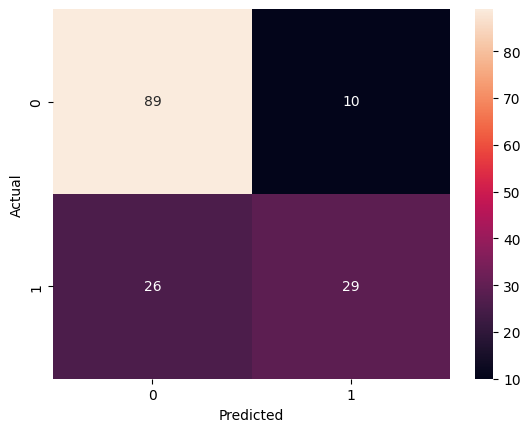

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [28]:
KNN=KNeighborsClassifier(n_neighbors=max_k)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred))

In [30]:
heart=pd.DataFrame(pd.read_csv("heart.csv"))
heart
Scaler=StandardScaler()
for i in heart.columns[:-1]:
  heart[i]=Scaler.fit_transform(heart[[i]])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


[0.8524590163934426, 0.819672131147541, 0.8688524590163934, 0.8852459016393442, 0.9180327868852459, 0.9344262295081968, 0.9180327868852459, 0.8524590163934426, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8688524590163934, 0.8852459016393442, 0.8688524590163934, 0.9016393442622951, 0.8852459016393442, 0.8852459016393442, 0.9016393442622951, 0.8852459016393442, 0.8852459016393442]


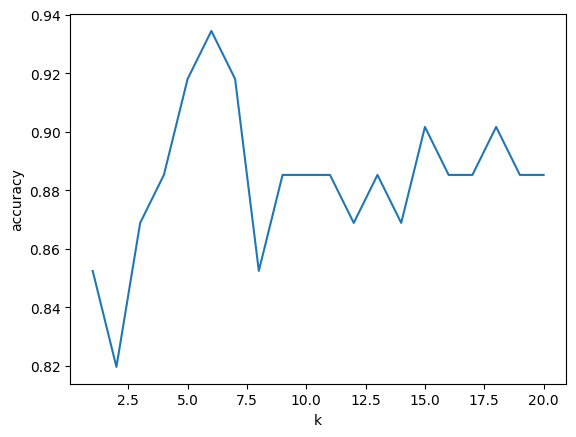

max_acc: 0.9344262295081968
max_k: 6


In [31]:
X_train,X_test,y_train,y_test=train_test_split(heart.drop("target",axis=1),heart["target"],test_size=0.2,random_state=42)
a=[]
max_acc=0
max_k=0
for k in range(1,21):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train,y_train)
  y_pred=KNN.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  a.append(acc)
  if acc>max_acc:
    max_acc=acc
    max_k=k
print(a)
plt.plot(range(1,21),a)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()
print("max_acc:",max_acc)
print("max_k:",max_k)

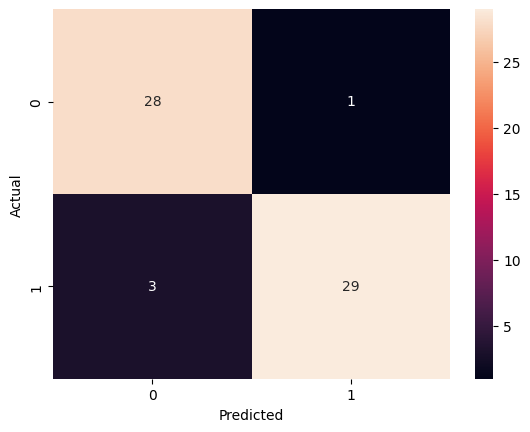

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [32]:
KNN=KNeighborsClassifier(n_neighbors=max_k)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred))